# Maaz Ahmed

# Read nba.xlsx in pandas dataframe.

In [3]:
# Importing Pandas
import pandas as pd

In [4]:
# Importing data file
data = pd.read_csv("nba.csv")

data

,Name,Team,Number,Position,Age,Height,Weight,College,Salary
0,Avery Bradley,Boston Celtics,0.0,PG,25.0,6-2,180.0,Texas,7730337.0
1,Jae Crowder,Boston Celtics,99.0,SF,25.0,6-6,235.0,Marquette,6796117.0
2,John Holland,Boston Celtics,30.0,SG,27.0,6-5,205.0,Boston University,NaN
3,R.J. Hunter,Boston Celtics,28.0,SG,22.0,6-5,185.0,Georgia State,1148640.0
4,Jonas Jerebko,Boston Celtics,8.0,PF,29.0,6-10,231.0,NaN,5000000.0
...,...,...,...,...,...,...,...,...,...
453,Shelvin Mack,Utah Jazz,8.0,PG,26.0,6-3,203.0,Butler,2433333.0
454,Raul Neto,Utah Jazz,25.0,PG,24.0,6-1,179.0,NaN,900000.0
455,Tibor Pleiss,Utah Jazz,21.0,C,26.0,7-3,256.0,NaN,2900000.0
456,Jeff Withey,Utah Jazz,24.0,C,26.0,7-0,231.0,Kansas,947276.0


In [76]:
temp_data = data.head()
temp_data

,Name,Team,Number,Position,Age,Height,Weight,College,Salary
0,Avery Bradley,Boston Celtics,0.0,PG,25.0,6-2,180.0,Texas,7730337.0
1,Jae Crowder,Boston Celtics,99.0,SF,25.0,6-6,235.0,Marquette,6796117.0
2,John Holland,Boston Celtics,30.0,SG,27.0,6-5,205.0,Boston University,NaN
3,R.J. Hunter,Boston Celtics,28.0,SG,22.0,6-5,185.0,Georgia State,1148640.0
4,Jonas Jerebko,Boston Celtics,8.0,PF,29.0,6-10,231.0,NaN,5000000.0


# Calculate five number summary for categorical and numerical variables.

In [137]:
# describes provides some of the basic overview of the dataframe
# ['o'] this parameter is use for objects
data.describe(include=['O'])

,Name,Team,Position,Height,College
count,457,457,457,457,373
unique,457,30,5,18,118
top,Josh Huestis,New Orleans Pelicans,SG,6-9,Kentucky
freq,1,19,102,59,22


# Identify how many rows have missing values.

In [100]:
# is null is a functon that check the coloms having NaN value.
# sum() adds them and retuns total no
# data.isnull().sum().sum()

# value_counts provides the total no of true and false 
temp_data.isnull().value_counts()


Name   Team   Number  Position  Age    Height  Weight  College  Salary
False  False  False   False     False  False   False   False    False     3
                                                                True      1
                                                       True     False     1
dtype: int64

# Replace missing values with relevant column mean or mode depending on type of column (such as replace missing city with most occurring city and replace age with mean age of column)

In [101]:
# fillna() fills the empty spaces 
a = data.fillna({'Team':data['Team'].mode()[0] , 'Number':data['Number'].mode()[0], 'Position':data['Position'].mode()[0], 'Age':data['Age'].mode()[0], 'Height':data['Height'].mode()[0], 'Weight':data['Weight'].mode()[0], 'College':data['College'].mode()[0], 'Salary':data['Salary'].mode()[0]})

# counts the no of occrence and groupby() is checking the column
# data.groupby('Name').count()

a.tail()

,Name,Team,Number,Position,Age,Height,Weight,College,Salary
453,Shelvin Mack,Utah Jazz,8.0,PG,26.0,6-3,203.0,Butler,2433333.0
454,Raul Neto,Utah Jazz,25.0,PG,24.0,6-1,179.0,Kentucky,900000.0
455,Tibor Pleiss,Utah Jazz,21.0,C,26.0,7-3,256.0,Kentucky,2900000.0
456,Jeff Withey,Utah Jazz,24.0,C,26.0,7-0,231.0,Kansas,947276.0
457,NaN,New Orleans Pelicans,5.0,SG,24.0,6-9,220.0,Kentucky,947276.0


# Identify how many unique teams are there in the data

In [132]:
# concat() combines two columns and unique identify the columns values and shape returns the sum of all that
pd.concat([data['Team'],data['Number']]).unique().shape 


(84,)

# Find the average salary of each team.

In [169]:
# groupby() is used for grouping the data according to the categories and apply a function to the categories. 
# It also helps to aggregate data efficiently.
data.groupby(by=['Team'])['Salary'].mean()

Team
Atlanta Hawks             4.860197e+06
Boston Celtics            4.181505e+06
Brooklyn Nets             3.501898e+06
Charlotte Hornets         5.222728e+06
Chicago Bulls             5.785559e+06
Cleveland Cavaliers       7.642049e+06
Dallas Mavericks          4.746582e+06
Denver Nuggets            4.294424e+06
Detroit Pistons           4.477884e+06
Golden State Warriors     5.924600e+06
Houston Rockets           5.018868e+06
Indiana Pacers            4.450122e+06
Los Angeles Clippers      6.323643e+06
Los Angeles Lakers        4.784695e+06
Memphis Grizzlies         5.467920e+06
Miami Heat                6.347359e+06
Milwaukee Bucks           4.350220e+06
Minnesota Timberwolves    4.593054e+06
New Orleans Pelicans      4.355304e+06
New York Knicks           4.581494e+06
Oklahoma City Thunder     6.251020e+06
Orlando Magic             4.297248e+06
Philadelphia 76ers        2.213778e+06
Phoenix Suns              4.229676e+06
Portland Trail Blazers    3.220121e+06
Sacramento Kings    

# Plot that average salary using pandas (use line plot)

In [42]:
import matplotlib as plt

<AxesSubplot:xlabel='Team'>

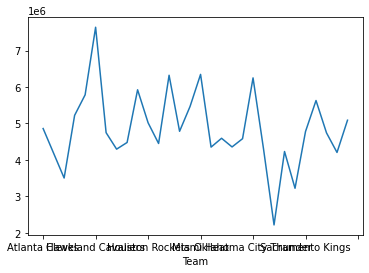

In [176]:
# plot() is use to plot the graph
data.groupby(by=['Team'])['Salary'].mean().plot()

# Filter all players having age greater than 30, height 7-0 and weight greater than 100.

In [184]:
data[(data['Age']>=30) & (data['Weight']>100)]

,Name,Team,Number,Position,Age,Height,Weight,College,Salary
19,Jarrett Jack,Brooklyn Nets,2.0,PG,32.0,6-3,200.0,Georgia Tech,6300000.0
30,Arron Afflalo,New York Knicks,4.0,SG,30.0,6-5,210.0,UCLA,8000000.0
31,Lou Amundson,New York Knicks,17.0,PF,33.0,6-9,220.0,UNLV,1635476.0
33,Carmelo Anthony,New York Knicks,7.0,SF,32.0,6-8,240.0,Syracuse,22875000.0
34,Jose Calderon,New York Knicks,3.0,PG,34.0,6-3,200.0,NaN,7402812.0
...,...,...,...,...,...,...,...,...,...
415,Randy Foye,Oklahoma City Thunder,6.0,SG,32.0,6-4,213.0,Villanova,3135000.0
420,Nazr Mohammed,Oklahoma City Thunder,13.0,C,38.0,6-10,250.0,Kentucky,222888.0
421,Anthony Morrow,Oklahoma City Thunder,2.0,SG,30.0,6-5,210.0,Georgia Tech,3344000.0
434,Chris Kaman,Portland Trail Blazers,35.0,C,34.0,7-0,265.0,Central Michigan,5016000.0


# For each player check if the player's college is 'North Carolina' then add 100 dollars to his salary otherwise add 10 dollars.

In [210]:
data[data['College']=='North Carolina'].Salary+100

data[data['College']!='North Carolina'].Salary+10

data['Salary'] = pd.concat([(data[data['College']=='North Carolina'].Salary+100),(data[data['College']!='North Carolina'].Salary+10)],ignore_index=False)

data

,Name,Team,Number,Position,Age,Height,Weight,College,Salary
0,Avery Bradley,Boston Celtics,0.0,PG,25.0,6-2,180.0,Texas,7730377.0
1,Jae Crowder,Boston Celtics,99.0,SF,25.0,6-6,235.0,Marquette,6796157.0
2,John Holland,Boston Celtics,30.0,SG,27.0,6-5,205.0,Boston University,NaN
3,R.J. Hunter,Boston Celtics,28.0,SG,22.0,6-5,185.0,Georgia State,1148680.0
4,Jonas Jerebko,Boston Celtics,8.0,PF,29.0,6-10,231.0,NaN,5000040.0
...,...,...,...,...,...,...,...,...,...
453,Shelvin Mack,Utah Jazz,8.0,PG,26.0,6-3,203.0,Butler,2433373.0
454,Raul Neto,Utah Jazz,25.0,PG,24.0,6-1,179.0,NaN,900040.0
455,Tibor Pleiss,Utah Jazz,21.0,C,26.0,7-3,256.0,NaN,2900040.0
456,Jeff Withey,Utah Jazz,24.0,C,26.0,7-0,231.0,Kansas,947316.0


# Print records start index = 10 and end index = 200.

In [214]:
# iloc work on indexing no 
data.iloc[10:200]

,Name,Team,Number,Position,Age,Height,Weight,College,Salary
10,Jared Sullinger,Boston Celtics,7.0,C,24.0,6-9,260.0,Ohio State,2569300.0
11,Isaiah Thomas,Boston Celtics,4.0,PG,27.0,5-9,185.0,Washington,6912909.0
12,Evan Turner,Boston Celtics,11.0,SG,27.0,6-7,220.0,Ohio State,3425550.0
13,James Young,Boston Celtics,13.0,SG,20.0,6-6,215.0,Kentucky,1749880.0
14,Tyler Zeller,Boston Celtics,44.0,C,26.0,7-0,253.0,North Carolina,2617375.0
...,...,...,...,...,...,...,...,...,...
195,Anthony Tolliver,Detroit Pistons,43.0,PF,31.0,6-8,240.0,Creighton,3000040.0
196,Lavoy Allen,Indiana Pacers,5.0,PF,27.0,6-9,255.0,Temple,4050040.0
197,Rakeem Christmas,Indiana Pacers,25.0,PF,24.0,6-9,250.0,Syracuse,1007066.0
198,Monta Ellis,Indiana Pacers,11.0,SG,30.0,6-3,185.0,NaN,10300040.0


# Drop Na and export csv.

In [217]:
# droping empty spaces
data.dropna()
# Export
data.to_csv('New_data')

# Print datatypes of columns.

In [219]:
data.dtypes

Name         object
Team         object
Number      float64
Position     object
Age         float64
Height       object
Weight      float64
College      object
Salary      float64
dtype: object

# Using the link read html into pandas dataframe (https://en.wikipedia.org/wiki/Minnesota)

In [223]:
web_data = pd.read_html('https://en.wikipedia.org/wiki/Minnesota')
pd.DataFrame(data=web_data)
web_data

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\internals\construction.py:309: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  values = np.array([convert(v) for v in values])


[                                            Minnesota  \
 0                                               State   
 1                                  State of Minnesota   
 2   .mw-parser-output .ib-settlement-cols{text-ali...   
 3   Nickname(s): Land of 10,000 Lakes;North Star S...   
 4   Motto(s): L'Étoile du Nord (French: The Star o...   
 5                           Anthem: "Hail! Minnesota"   
 6   Map of the United States with Minnesota highli...   
 7                                             Country   
 8                                    Before statehood   
 9                               Admitted to the Union   
 10                                            Capital   
 11                                       Largest city   
 12                      Largest metro and urban areas   
 13                                         Government   
 14                                         • Governor   
 15                              • Lieutenant Governor   
 16           

# Print unique teams and their number of players

In [13]:
#data['Team'].value_counts()

data.groupby(by=['Team'])['Salary'].count()

Team
Atlanta Hawks             15
Boston Celtics            14
Brooklyn Nets             15
Charlotte Hornets         15
Chicago Bulls             15
Cleveland Cavaliers       14
Dallas Mavericks          15
Denver Nuggets            14
Detroit Pistons           15
Golden State Warriors     15
Houston Rockets           15
Indiana Pacers            15
Los Angeles Clippers      15
Los Angeles Lakers        15
Memphis Grizzlies         14
Miami Heat                13
Milwaukee Bucks           16
Minnesota Timberwolves    13
New Orleans Pelicans      19
New York Knicks           16
Oklahoma City Thunder     15
Orlando Magic             14
Philadelphia 76ers        14
Phoenix Suns              15
Portland Trail Blazers    15
Sacramento Kings          15
San Antonio Spurs         15
Toronto Raptors           15
Utah Jazz                 15
Washington Wizards        15
Name: Salary, dtype: int64

# Calculate average age, number, salary of each team.

In [303]:
data.Age.mean()

data.Salary.mean()

data.Number.mean()

17.678336980306344